In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.stats as st
import math

In [167]:
df = pd.read_csv('/Users/ianbury/Springboard/FantasyFootball/chckpt1.csv').drop('Unnamed: 0',axis=1)


In [168]:
#Filtering to offensive positions only
off_pos = ['QB','RB','TE','WR']
df = df[df.position.isin(off_pos)]

In [5]:
#Group by position, year, player to find top 25 players in each position for each season.
top_by_pos = df.groupby(['position','season_year','player_id'])[['fantasy_score']].agg(['sum','mean','count']).reset_index()

In [6]:
top_by_pos.sort_values(['position','season_year',('fantasy_score','mean')], ascending=False,inplace=True)

In [7]:
#Create list of dfs with top 25 for each position, season
dfs=[]

for y in top_by_pos['season_year'].unique():
    for p in top_by_pos['position'].unique():
        fr=top_by_pos[(top_by_pos['position']==p)&(top_by_pos['season_year']==y)].sort_values(('fantasy_score','mean'),ascending=False).head(25)
        dfs.append(fr)
        
        

        

In [8]:
#tp = season-level score aggregates for top 25 players in each position, season.
tp = pd.concat(dfs)

In [9]:
#Even if someone was in the top 25 in >=1 season, doesn't mean we want all their data from all seasons, just the season
#in which they were top 25.
#Create dict of list of top 25 player ids for each season.
top_25_by_season={}
for s in tp['season_year'].unique():
    top_25_by_season[s]=tp[tp.season_year==s]['player_id']

In [10]:
#For each season, filter down to plays to where a top 25 player (for that season) participated
top_plays=[]
for k in top_25_by_season:
    temp=df[(df.season_year==k)&(df.player_id.isin(top_25_by_season[k]))]
    top_plays.append(temp)

In [11]:
#concat all the seasons
top_plays_data = pd.concat(top_plays)

In [12]:
#Looks like early years of data are not so good as we thought. There isn't even data for 25 players in each position. 
#We may want to only look at 2013 and beyond.
a = tp.groupby(by=['season_year','position']).count()
a

/Users/ianbury/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


player_id fantasy_score           
                                         sum mean count
season_year position                                   
2009        QB              17            17   17    17
            RB               5             5    5     5
            TE               7             7    7     7
            WR              13            13   13    13
2010        QB              20            20   20    20
            RB               7             7    7     7
            TE              13            13   13    13
            WR              19            19   19    19
2011        QB              24            24   24    24
            RB              15            15   15    15
            TE              20            20   20    20
            WR              25            25   25    25
2012        QB              25            25   25    25
            RB              24            24   24    24
            TE              21            21   21    21
            WR              25            25   25    25
2013        QB              25            25   25    25
            RB              25            25   25    25
            TE              25            25   25    25
            WR              25            25   25    25
2014        QB              25            25   25    25
            RB              25            25   25    25
            TE              25            25   25    25
            WR              25            25   25    25
2015        QB              25            25   25    25
            RB              25            25   25    25
            TE              25            25   25    25
            WR              25            25   25    25
2016        QB              25            25   25    25
            RB              25            25   25    25
            TE              25            25   25    25
            WR              25            25   25    25
2017        QB              25            25   25    25
            RB              25            25   25    25
            TE              25            25   25    25
            WR              25            25   25    25

In [13]:
top_plays_data = top_plays_data[top_plays_data.season_year>=2013]

# Data Storytelling

In [14]:
sns.set()
tp.columns = tp.columns.droplevel()

In [15]:
tp.columns=['position','season_year','player_id','score_season_sum','score_season_mean','num_of_games']

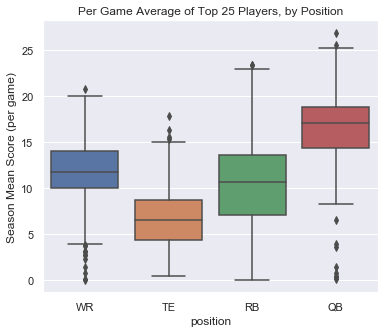

In [16]:
fig = plt.figure(figsize=(6,5))
_=sns.boxplot(y='score_season_mean',x='position',data=tp)
_=plt.ylabel('Season Mean Score (per game)')
_=plt.title('Per Game Average of Top 25 Players, by Position')
#RB's have a huge range, and QBs score the most, on average.

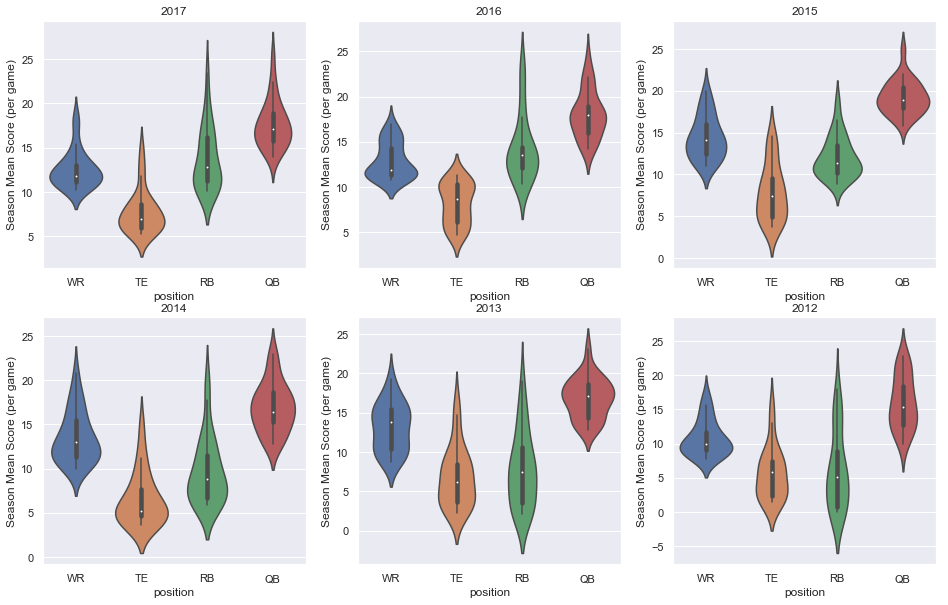

In [17]:
fig = plt.figure(figsize=(16,10))
years = list(tp.season_year.unique())[0:6]
for i in range(len(years)):
    plt.subplot(2,3,i+1)
    d=tp[tp['season_year']==years[i]]
    sns.violinplot(y='score_season_mean',x='position',data=d)
    plt.title(years[i])
    plt.ylabel('Season Mean Score (per game)')


# What's distribution of average points scored by position?

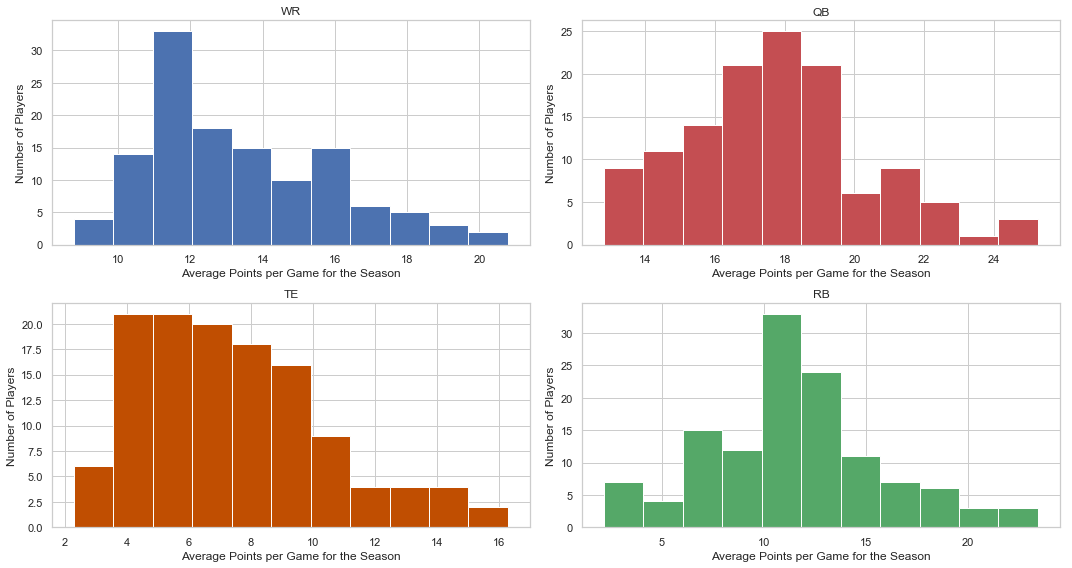

In [144]:
#As stated above, I'll drop years prior to 2013 due to incomplete data.
tpp = tp[tp.season_year>=2013]
inc=0
fig=plt.figure(figsize=(15,8))
colors=['b','r','xkcd:burnt orange','g']
for p in pos:
    plt.subplot(2,2,inc+1)
    _=plt.hist(tpp[tpp.position==p].score_season_mean,color=colors[inc],bins=math.floor(np.sqrt(len(tpp[tpp.position==p]))))
    _=plt.xlabel('Average Points per Game for the Season')
    _=plt.ylabel('Number of Players')
    _=plt.title(p)
    plt.tight_layout()
    inc+=1
plt.show()

Right skew means there are less truly high-performers available in that position, whereas left skew may mean that there are more options at that position when seeking to maximize scoring potential.

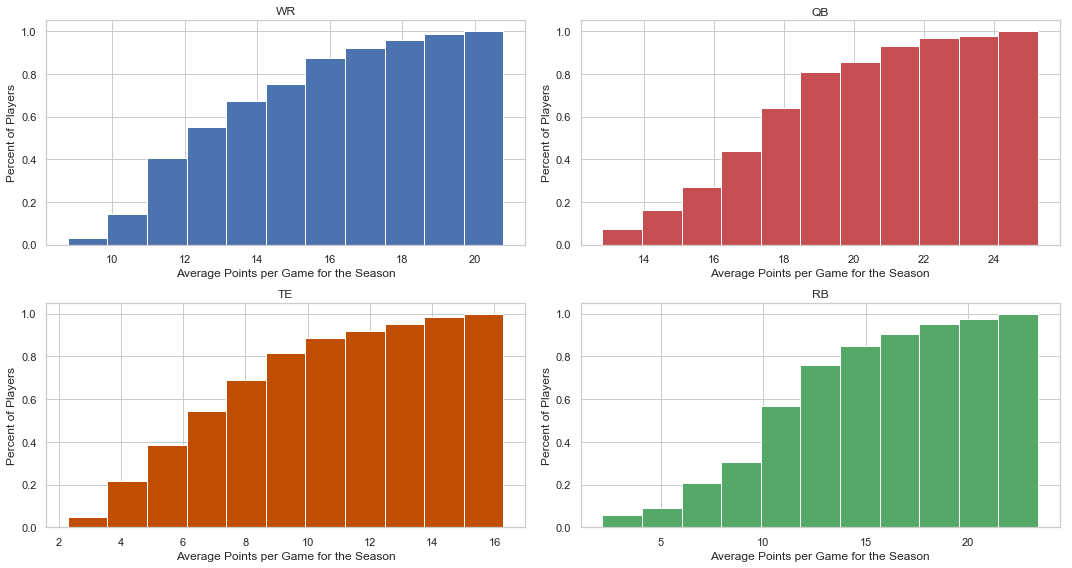

In [158]:
tpp = tp[tp.season_year>=2013]
inc=0
fig=plt.figure(figsize=(15,8))
colors=['b','r','xkcd:burnt orange','g']
for p in pos:
    plt.subplot(2,2,inc+1)
    _=plt.hist(tpp[tpp.position==p].score_season_mean,normed=True,color=colors[inc],cumulative=True,bins=math.floor(np.sqrt(len(tpp[tpp.position==p]))))
    _=plt.xlabel('Average Points per Game for the Season')
    _=plt.ylabel('Percent of Players')
    _=plt.title(p)
    plt.tight_layout()
    inc+=1
plt.show()

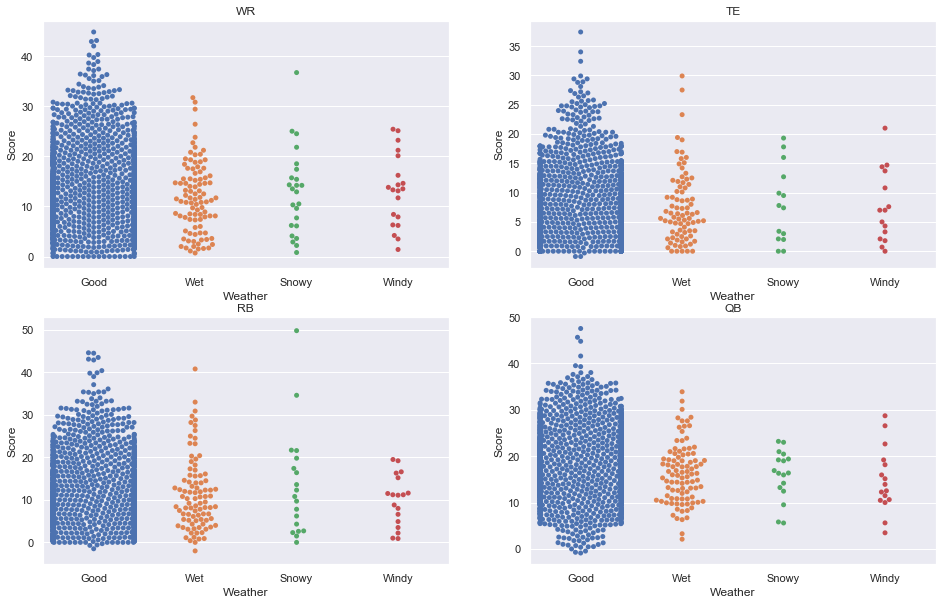

In [19]:
#Leaving this ugly plot to demonstrate that swarm plots are not always the best for large amounts of data
fig = plt.figure(figsize=(16,10))
pos = list(tp.position.unique())
for i in range(len(pos)):
    plt.subplot(2,2,i+1)
    d=top_plays_data[(top_plays_data['position']==pos[i])&(top_plays_data.season_year>=2012)]
    sns.swarmplot(x='desc_simple',y='fantasy_score',data=d)
    plt.title(pos[i])
    plt.ylabel('Score')
    plt.xlabel('Weather')


/Users/ianbury/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/ianbury/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


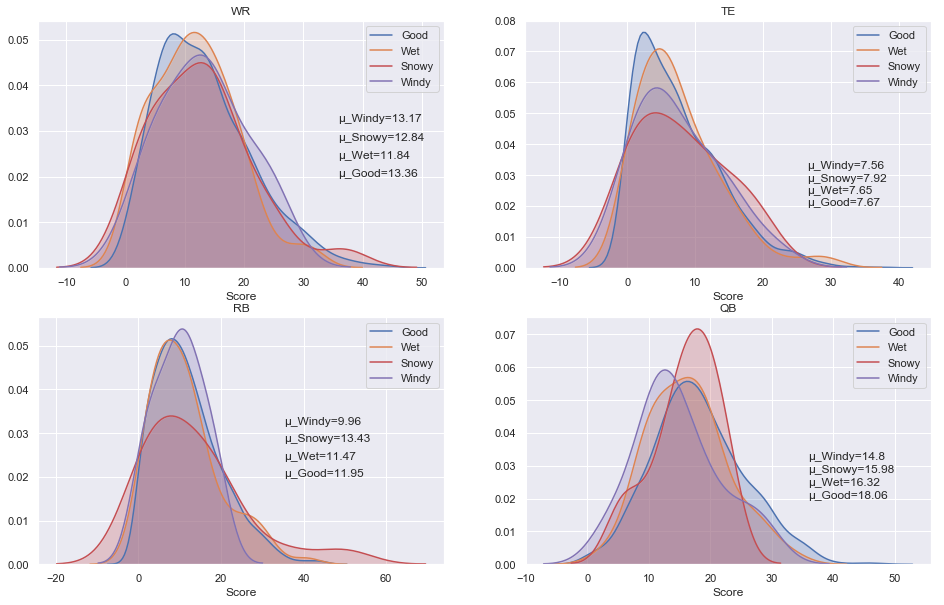

In [20]:
fig = plt.figure(figsize=(16,10))
pos = list(tp.position.unique())
for i in range(len(pos)):
    plt.subplot(2,2,i+1)
    d=top_plays_data[(top_plays_data['position']==pos[i])&(top_plays_data.season_year>=2012)]
    inc = 0
    for w in d.desc_simple.unique():
        data=d[d['desc_simple']==w].fantasy_score
        _=sns.distplot(data,hist=False,  kde_kws={"shade": True},label=w)
        if str(w) != 'nan':
            _.text(d.fantasy_score.quantile(0.99),0.02+(inc*0.004),
                   u"\u00B5"+'_'+str(w)+'='+str(np.round(np.mean(data),2)))
            inc += 1
    plt.title(pos[i])
    plt.legend()

    plt.xlabel('Score')

Distribution plots tell the story much better. <br>
1) TEs have more variance, but higher scoring potential in bad weather.<br>
2) WRs don't have as much variance as one might expect, based on weather. <br>
3) QBs have a worse time with wet and windy weather than fair or even snowy weather.<br>
4) RBs tend to outperform in snowy weather<br>

In [21]:
#Finding difference in score week to week, masking week 1.
mask=(top_plays_data['week']!=1)
tpd_valid = top_plays_data[mask]
top_plays_data['change_vs_last'] = np.nan
top_plays_data.loc[mask,'change_vs_last'] = tpd_valid['fantasy_score']-tpd_valid['prev_score']


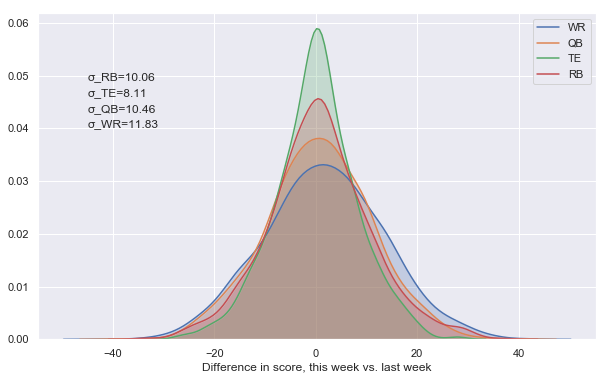

In [22]:
#TE has the least variance week to week. The other positions have little difference in variance between them.
fig = plt.figure(figsize=(10,6))
pos = list(top_plays_data.position.unique())
inc=0
for i in pos:
    data=top_plays_data[top_plays_data['position']==i]['change_vs_last'].dropna()
    _=sns.distplot(data,hist=False, kde_kws={"shade":True},label=i)
    _.text(-45,0.04+inc,u"\u03C3"+'_'+str(i)+'='+str(np.round(np.std(data),2)))
    inc+=0.003
plt.legend()
plt.xlabel('Difference in score, this week vs. last week')

# Correlation between Opportunity and Score


In [23]:
top_plays_data.columns

Index(['gsis_id', 'player_id', 'team', 'name_fixed', 'position', 'years_pro',
       'height', 'weight', 'start_time', 'week', 'day_of_week', 'season_year',
       'season_type', 'home_team', 'away_team', 'home_score', 'away_score',
       'fantasy_score', 'fumbles_rec_tds', 'fumbles_lost', 'passing_int',
       'passing_yds', 'passing_tds', 'passing_twoptm', 'receiving_rec',
       'receiving_tds', 'receiving_twoptm', 'receiving_yds', 'rushing_yds',
       'rushing_tds', 'rushing_twoptm', 'kicking_rec_tds', 'puntret_tds',
       'receiving_tar', 'rushing_att', 'passing_att', 'forecast', 'home',
       'Year', 'Week', 'team_id', 'city', 'name', 'temp', 'desc',
       'desc_simple', 'prev_score', 'avg3_score', 'avg5_score', 'avg3_tar',
       'avg5_tar', 'avg3_rush_att', 'avg5_rush_att', 'prev_tar',
       'prev_rush_att', 'prev_pass_att', 'avg3_pass_att', 'avg5_pass_att',
       'change_vs_last'],
      dtype='object')

In [24]:
tpd_attempts=top_plays_data[['position','rushing_att','passing_att','receiving_tar','fantasy_score']]

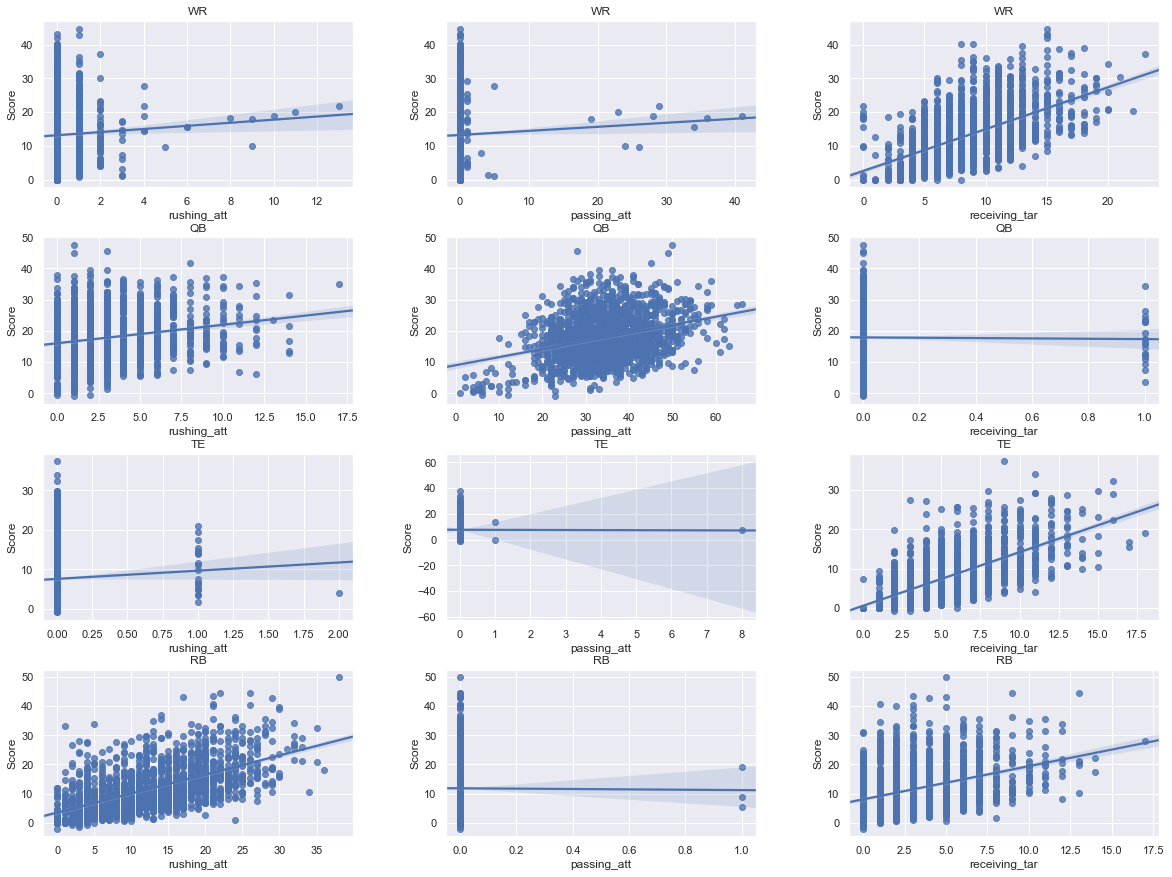

In [25]:
#Correlation between 'opportunity type' (e.g. rushing, passing, receiving) and position. Obviously some of these
#charts are not applicable (ex. QBs don't often catch passes)
fig = plt.figure(figsize=(20,15))
pos = tpd_attempts.position.unique()
att_type = ['rushing_att','passing_att','receiving_tar']
z=1

for p in range(len(pos)):
    data=tpd_attempts[tpd_attempts.position==pos[p]]
    for a in range(len(att_type)):
        plt.subplot(4,3,z)
        _=sns.regplot(data[att_type[a]],data['fantasy_score'])
        plt.title(pos[p])
        plt.ylabel('Score')
        plt.xlabel(att_type[a])
        z+=1
    
plt.subplots_adjust(wspace=0.3,hspace=0.3)


The subplots we care about are:
<br>(0,2) - WRs x receiving_tar
<br>(1,0)&(1,1) - QBs x rushing_att, passing_att
<br>(2,0)&(2,2) - RBs x rushing_att, receiving_att
<br>(3,2) - TEs x receiving_att

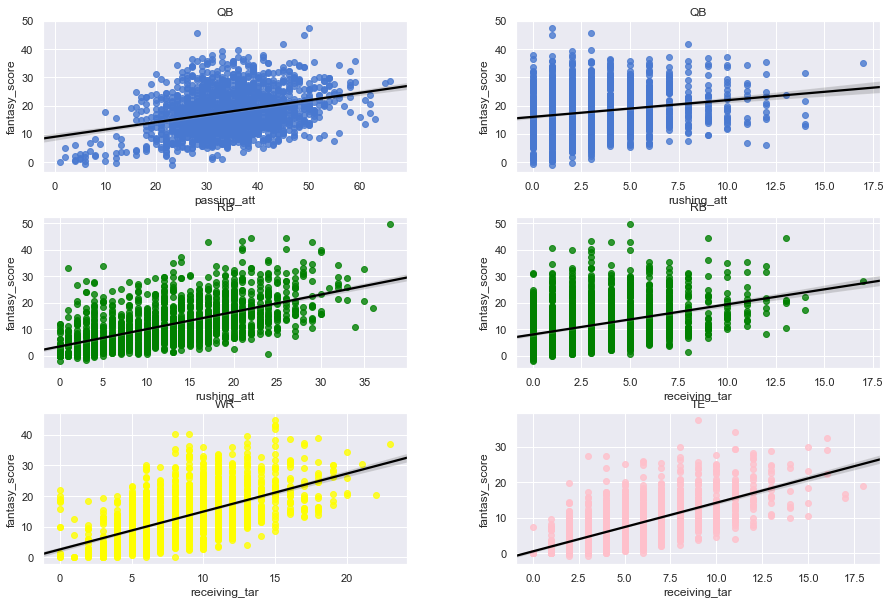

In [34]:
sns.set_palette('muted')
fig = plt.figure(figsize=(15,10))
QB=tpd_attempts[tpd_attempts.position=='QB']
RB=tpd_attempts[tpd_attempts.position=='RB']
WR=tpd_attempts[tpd_attempts.position=='WR']
TE=tpd_attempts[tpd_attempts.position=='TE']
plt.subplot(3,2,1)
_=sns.regplot(QB['passing_att'],QB['fantasy_score'],line_kws={'color':'black'})
plt.title('QB')
plt.subplot(3,2,2)
_=sns.regplot(QB['rushing_att'],QB['fantasy_score'],line_kws={'color':'black'})
plt.title('QB')
plt.subplot(3,2,3)
_=sns.regplot(RB['rushing_att'],RB['fantasy_score'],color='green',line_kws={'color':'black'})
plt.title('RB')
plt.subplot(3,2,4)
plt.title('RB')
_=sns.regplot(RB['receiving_tar'],RB['fantasy_score'],color='green',line_kws={'color':'black'})
plt.subplot(3,2,5)
plt.title('WR')
_=sns.regplot(WR['receiving_tar'],WR['fantasy_score'],color='yellow',line_kws={'color':'black'})
plt.subplot(3,2,6)
plt.title('TE')
_=sns.regplot(TE['receiving_tar'],TE['fantasy_score'],color='pink',line_kws={'color':'black'})
plt.subplots_adjust(wspace=0.3,hspace=0.3)


In [27]:
print('CorrCoeff. for QB x Passing Attempts : '+str(round(st.pearsonr(QB['passing_att'],QB['fantasy_score'])[0],4)))
print('CorrCoeff. for QB x Rushing Attempts : '+str(round(st.pearsonr(QB['rushing_att'],QB['fantasy_score'])[0],4)))
print('CorrCoeff. for RB x Rushing Attempts : '+str(round(st.pearsonr(RB['rushing_att'],RB['fantasy_score'])[0],4)))
print('CorrCoeff. for RB x Targets : '+str(round(st.pearsonr(RB['receiving_tar'],RB['fantasy_score'])[0],4)))
print('CorrCoeff. for WR x Targets : '+str(round(st.pearsonr(WR['receiving_tar'],WR['fantasy_score'])[0],4)))
print('CorrCoeff. for TE x Targets : '+str(round(st.pearsonr(TE['receiving_tar'],TE['fantasy_score'])[0],4)))

CorrCoeff. for QB x Passing Attempts : 0.3178
CorrCoeff. for QB x Rushing Attempts : 0.2052
CorrCoeff. for RB x Rushing Attempts : 0.598
CorrCoeff. for RB x Targets : 0.373
CorrCoeff. for WR x Targets : 0.5575
CorrCoeff. for TE x Targets : 0.6845


# Does prior performance correlate with future performance?

In [191]:
top_plays_data.season_year.unique()

array([2017, 2016, 2015, 2014, 2013])

In [174]:
prev_score = top_plays_data[['position','week','prev_score','avg3_score','avg5_score','fantasy_score']]

In [177]:
#Dropping week 1, can't compare to previous
prev_score=prev_score[prev_score.week!=1]

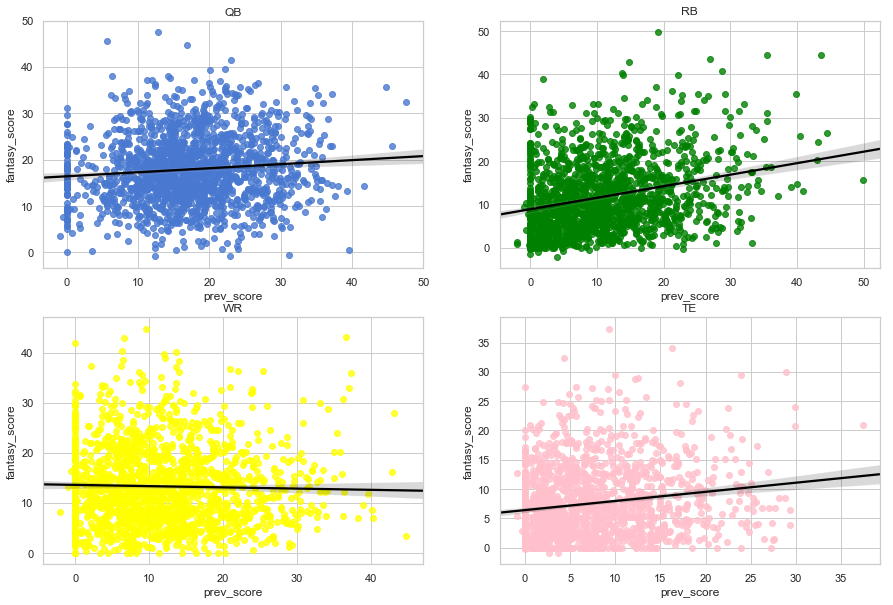

In [198]:
sns.set_palette('muted')
fig = plt.figure(figsize=(15,10))
QB=prev_score[prev_score.position=='QB']
WR=prev_score[prev_score.position=='WR']
RB=prev_score[prev_score.position=='RB']
TE=prev_score[prev_score.position=='TE']
plt.subplot(2,2,1)
plt.title('QB')
sns.regplot(x='prev_score',y='fantasy_score',data=QB,line_kws={'color':'black'})
plt.subplot(2,2,2)
plt.title('RB')
sns.regplot(x='prev_score',y='fantasy_score',color='green',data=RB,line_kws={'color':'black'})
plt.subplot(2,2,3)
plt.title('WR')
sns.regplot(x='prev_score',y='fantasy_score',color='yellow',data=WR,line_kws={'color':'black'})
plt.subplot(2,2,4)
plt.title('TE')
sns.regplot(x='prev_score',y='fantasy_score',color='pink',data=TE,line_kws={'color':'black'})

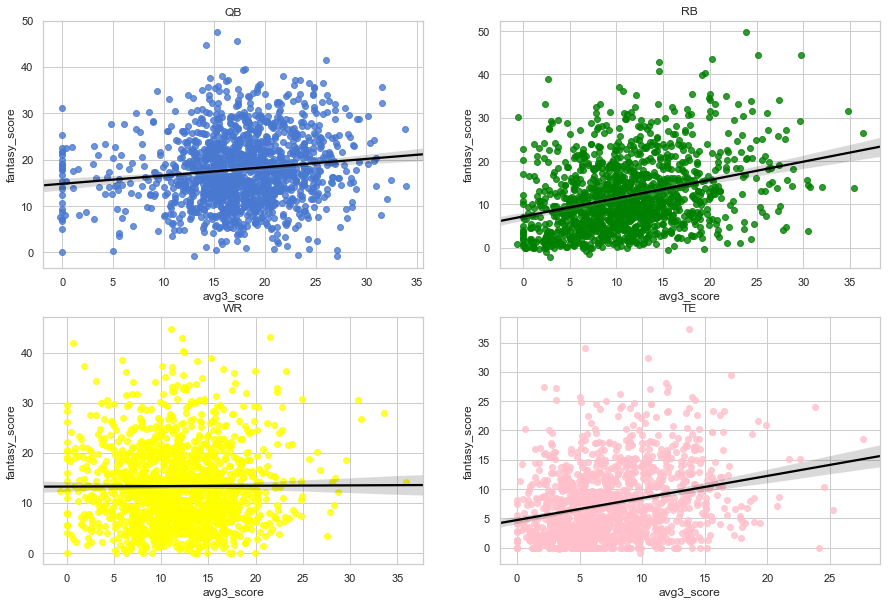

In [199]:
sns.set_palette('muted')
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('QB')
sns.regplot(x='avg3_score',y='fantasy_score',data=QB,line_kws={'color':'black'})
plt.subplot(2,2,2)
plt.title('RB')
sns.regplot(x='avg3_score',y='fantasy_score',color='green',data=RB,line_kws={'color':'black'})
plt.subplot(2,2,3)
plt.title('WR')
sns.regplot(x='avg3_score',y='fantasy_score',color='yellow',data=WR,line_kws={'color':'black'})
plt.subplot(2,2,4)
plt.title('TE')
sns.regplot(x='avg3_score',y='fantasy_score',color='pink',data=TE,line_kws={'color':'black'})

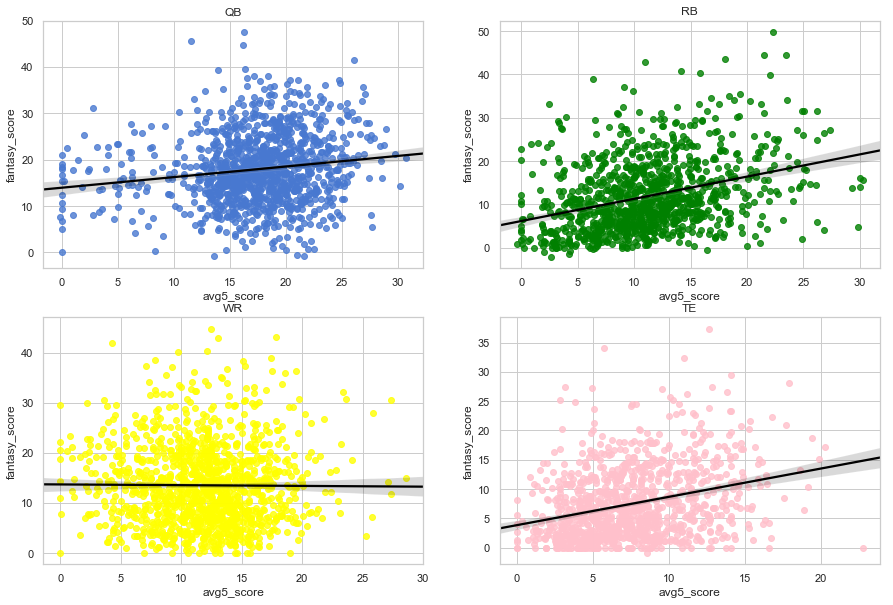

In [200]:
sns.set_palette('muted')
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('QB')
sns.regplot(x='avg5_score',y='fantasy_score',data=QB,line_kws={'color':'black'})
plt.subplot(2,2,2)
plt.title('RB')
sns.regplot(x='avg5_score',y='fantasy_score',color='green',data=RB,line_kws={'color':'black'})
plt.subplot(2,2,3)
plt.title('WR')
sns.regplot(x='avg5_score',y='fantasy_score',color='yellow',data=WR,line_kws={'color':'black'})
plt.subplot(2,2,4)
plt.title('TE')
sns.regplot(x='avg5_score',y='fantasy_score',color='pink',data=TE,line_kws={'color':'black'})

In [212]:
prev_score.drop('week',axis=1).corr('pearson')

,prev_score,avg3_score,avg5_score,fantasy_score
prev_score,1.000000,0.750957,0.688946,0.270993
avg3_score,0.750957,1.000000,0.915979,0.363358
avg5_score,0.688946,0.915979,1.000000,0.387270
fantasy_score,0.270993,0.363358,0.387270,1.000000


After all those plots, we see that rolling 5 game score has the highest correlation with fantasy_score, but it's still less than 0.4. As seen above, targets/attempts in a given game have a higher correlation with fantasy_score. A good next step is seeing if rolling 1,3,5 game targets/attempts have any correlation with fantasy_score.

# Scores over time

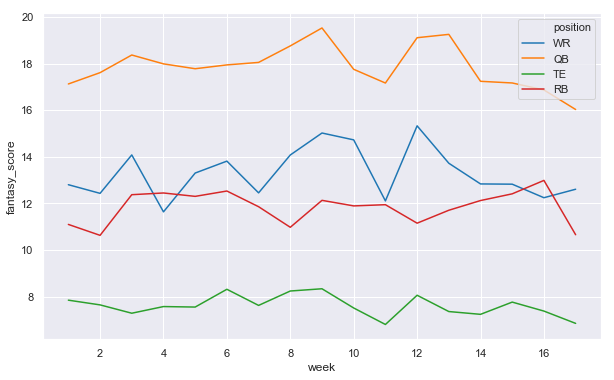

In [51]:
#Looking to see if any position tends to drop off as the season progresses.
fig=plt.figure(figsize=(10,6))
_=sns.lineplot(x='week',y='fantasy_score',data=top_plays_data, hue='position',ci=None,palette="tab10",legend='brief')
plt.legend(loc='best')

Looks like TEs, QBs, and WRs tend to drop off slightly as the season progresses, while RBs actually improve (with the exception of week 17)

# Do some teams tend to have more top performers?

In [88]:
t=top_plays_data.groupby(by=['season_year','team'])['player_id'].nunique().reset_index()
print('Total Number of Teams: '+str(df.team.nunique()))

Total Number of Teams: 34


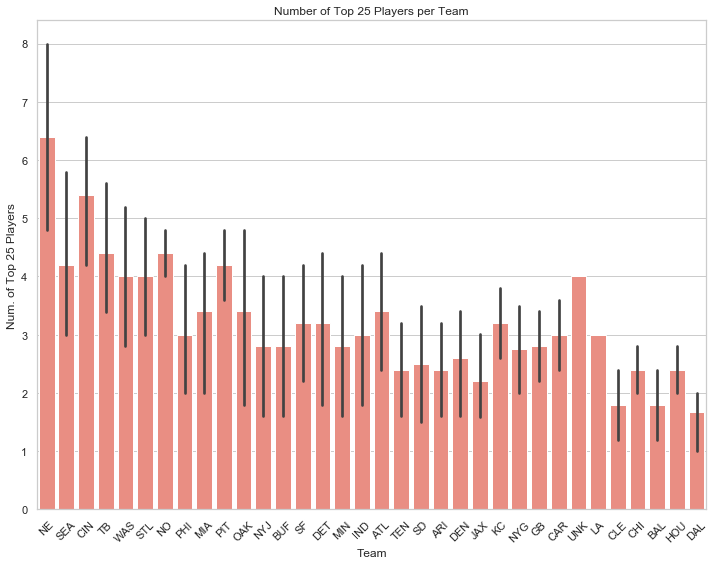

In [90]:
sns.set(style="whitegrid")
fig=plt.figure(figsize=(12,9))
sns.barplot(x='team',y='player_id',data=t.sort_values('player_id',ascending=False), color='salmon')
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Num. of Top 25 Players')
plt.title('Number of Top 25 Players per Team')

Clearly, some teams consistently produce more top performers than others.